In [4]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("data2.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.shape

(32561, 15)

In [7]:
df['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [8]:
df['sex'].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

In [9]:
df['native.country'].value_counts()

native.country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece       

In [10]:
df = df.drop(['education','fnlwgt'],axis=1)
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [11]:
df.replace('?',np.NaN,inplace=True)
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [12]:
df.fillna(method='ffill',inplace=True)
df.head()

/tmp/ipykernel_1053/1168442443.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',inplace=True)


,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,10,Widowed,Exec-managerial,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['workclass'] = le.fit_transform(df['workclass'])
df['marital.status'] = le.fit_transform(df['marital.status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])
df['native.country'] = le.fit_transform(df['native.country'])
df['income'] = le.fit_transform(df['income'])

df.head(10)

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,8,9,6,14,1,4,0,0,4356,40,38,0
1,82,3,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,10,6,3,4,2,0,0,4356,40,38,0
3,54,3,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,10,5,9,3,4,0,0,3900,40,38,0
5,34,3,9,0,7,4,4,0,0,3770,45,38,0
6,38,3,6,5,0,4,4,1,0,3770,40,38,0
7,74,6,16,4,9,2,4,0,0,3683,20,38,1
8,68,0,9,0,9,1,4,0,0,3683,40,38,0
9,41,3,10,4,2,4,4,1,0,3004,60,38,1


<Axes: xlabel='income', ylabel='age'>

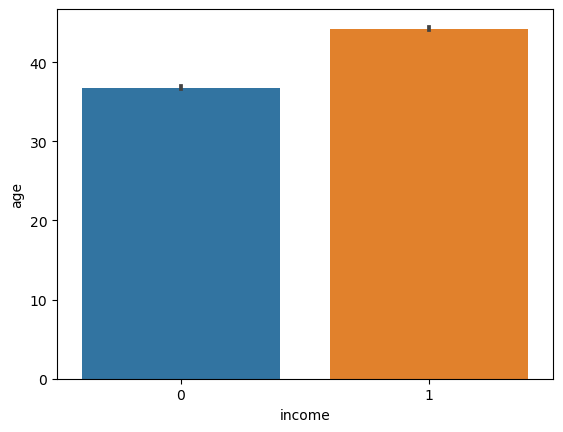

In [15]:
sns.barplot(x='income',y='age',data=df)

In [17]:
X = df.drop(['income'],axis=1)
y = df['income']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,8,9,6,14,1,4,0,0,4356,40,38,0
1,82,3,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,10,6,3,4,2,0,0,4356,40,38,0
3,54,3,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,10,5,9,3,4,0,0,3900,40,38,0


In [41]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [42]:
y_lr_train_pred=lr.predict(X_train)
y_lr_test_pred=lr.predict(X_test)

In [43]:
y_lr_test_pred

array([0.40132268, 0.2063829 , 0.69592191, ..., 0.3432153 , 0.1506792 ,
       0.15650648])

In [44]:
y_lr_train_pred

array([-0.07998355,  0.18048063,  0.36132299, ...,  0.06838639,
        0.37702563,  0.01269721])

In [40]:
#EVALUATE MODEL PERFORMANCE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lr_trained_mse= mean_squared_error(y_train,y_lr_train_pred)
lr_trained_r2=r2_score(y_train,y_lr_train_pred)

lr_trained_mse= mean_squared_error(y_train,y_lr_test_pred)
lr_trained_r2=r2_score(y_train,y_lr_test_pred)


ValueError: Found input variables with inconsistent numbers of samples: [26048, 6513]